# Computational Social Science Project #2 

**Enter your Name:** Juana Montoya-Murillo

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


%matplotlib inline

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv', 
                       dtype={"CountyFIPS": str}) 

In [3]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [4]:
diabetes.head(10)

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693
5,Bullock County,Alabama,01011,2321,3662,3333,73.6,10352,10352,0,...,7709,2026,1616,8202,4527,3675,123.2,1616,685,931
6,Butler County,Alabama,01013,2910,6999,6027,69.1,20025,19702,323,...,14631,4603,3806,15459,6967,8492,82.0,3806,1555,2251
7,Calhoun County,Alabama,01015,14692,34366,26949,73.7,115098,112362,2736,...,85310,23809,19386,89902,42495,47407,89.6,19386,8223,11163
8,Chambers County,Alabama,01017,4787,10974,7461,73.3,33826,33479,347,...,25589,7733,6409,26820,12684,14136,89.7,6409,2711,3698
9,Cherokee County,Alabama,01019,3176,7767,6136,86.7,25853,25645,208,...,19749,6708,5621,20567,10167,10400,97.8,5621,2611,3010


In [5]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [6]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()) 

['Suppressed']


In [7]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------
print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique()) 


['No Data']


In [8]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------
print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique()) 


['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [9]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!='Suppressed'] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int64') 

# Obesity
# ----------
diabetes = diabetes[diabetes['Obesity_Number']!='No Data'] 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int64') 

# Physical Inactivity
# ----------
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!='No Data'] 
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int64') 


# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype('float')

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [10]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]


# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [11]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


In [12]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_1,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some o

All rates bounded by 0 and 1

#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [13]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population',
 'sex and age_total population_65 years and over_1',
 'hispanic or latino and race_total population',
 'race_total population_one race_1',
 'sex and age_total population_18 years and over_1',
 'race_total population_two or more races_1']

In [14]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [15]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

### Age group distribution

In [16]:
diabetes.dtypes

County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                         float64
Obesity_Number                                                                                                                                          float64
Physical_Inactivity_Number                                                                                                                              float64
sex and age_total population_65 years an

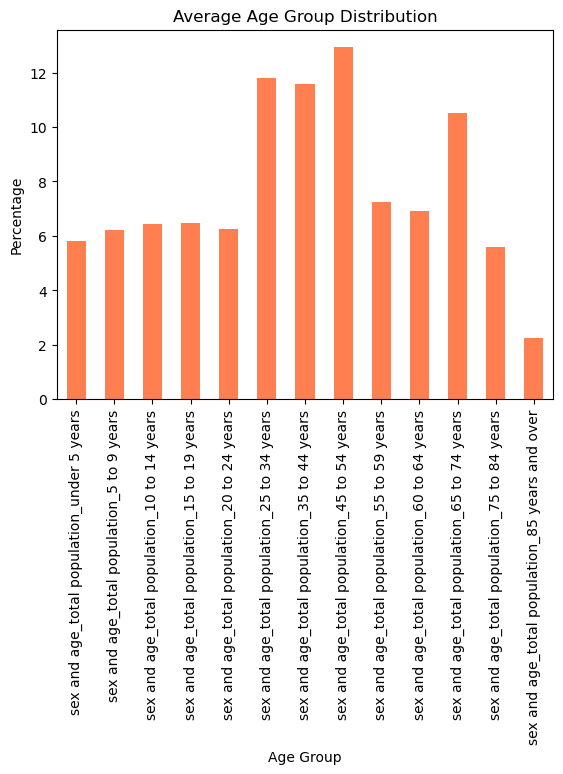

In [17]:
age_columns = ['sex and age_total population_under 5 years', 'sex and age_total population_5 to 9 years', 
               'sex and age_total population_10 to 14 years', 'sex and age_total population_15 to 19 years',
               'sex and age_total population_20 to 24 years', 'sex and age_total population_25 to 34 years',
               'sex and age_total population_35 to 44 years', 'sex and age_total population_45 to 54 years',
               'sex and age_total population_55 to 59 years','sex and age_total population_60 to 64 years',
               'sex and age_total population_65 to 74 years','sex and age_total population_75 to 84 years',
               'sex and age_total population_85 years and over']  

age_averages = diabetes[age_columns].mean()

(age_averages * 100).plot(kind='bar', color='coral')
plt.title('Average Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()



Age, as a demographic factor, has been shown to influence various health outcomes, including vulnerability to diseases like diabetes. The comosition of age groups within counties can provide a snapshot of the potential risk group, lifestyle choices, and healthcare needs. The graph presents the avarage age group distribution as a proportion of the total population. A few observations can be highlight:

* The largest proportion of the population falls within the age group of 25 to 34 years, followed closely by the age groups of 35 to 44 years and 45 to 54 years. This indicates a predominantly middle-aged population.
* Interestingly, the population proportion steadily increases from the youngest age group (under 5 years) to its peak in the 25 to 34 years bracket, after which it begins to decrease, though the decline is most sharp after the 65 to 74 years bracket.
* The lowest proportion is observed in the 85 years and over category, which is expected given the natural lifespan.

From these findings, it can be inferred that the majority of the population is in the working age group, which might impact economic activities, workforce dynamics, and even healthcare needs. The relatively smaller proportions in the younger and older age brackets may suggest a focus on middle-aged health issues and challenges when formulating health policies or interventions.

### Race distribution

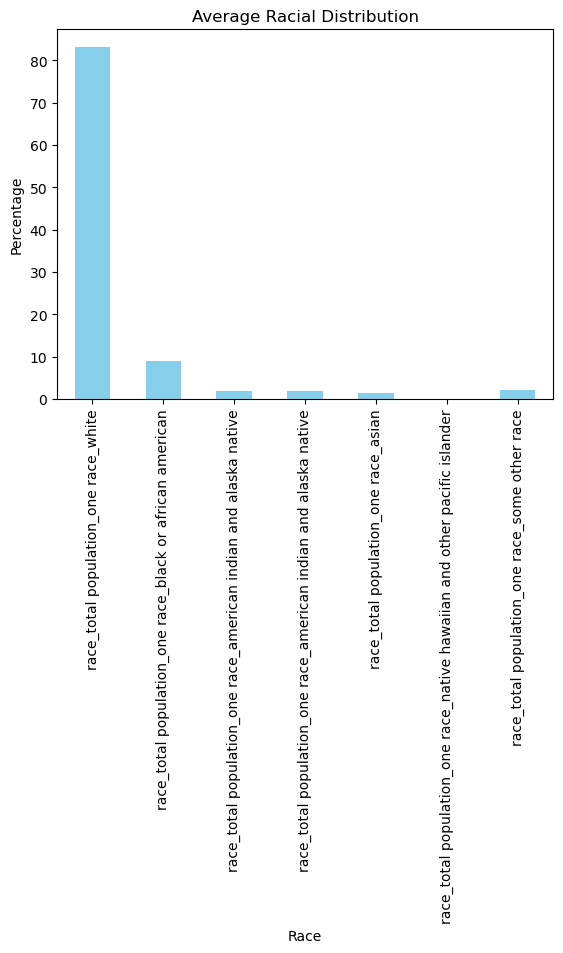

In [18]:
race_columns = ['race_total population_one race_white',
    'race_total population_one race_black or african american',
    'race_total population_one race_american indian and alaska native',
    'race_total population_one race_american indian and alaska native',
    'race_total population_one race_asian',
    'race_total population_one race_native hawaiian and other pacific islander',
    'race_total population_one race_some other race']
    

race_averages = diabetes[race_columns].mean()

(race_averages * 100).plot(kind='bar', color='skyblue')
plt.title('Average Racial Distribution')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


A grasp of the average racial distribution across counties is imperative for an inclusive health analysis. Historically, racial and ethnic disparities in health outcomes have been a concern in many societies. Some racial and ethnic groups may have genetic, cultural, or socio-economic factors that predispose them to certain health conditions. Analyzing the graph of the avarage racial distribution: we can make the following observations:

* A significant majority of the population identifies as "white", comprising over 70% of the total population. This indicates that health policies and interventions need to be attuned to the specific health concerns and challenges faced by this racial group.
* The second-largest racial group represented is "black or African American", though they form a considerably smaller percentage when juxtaposed with the white population. This underscores the need for special attention to health disparities, given that historically, this group has faced numerous health inequalities.
* Other racial categories such as "American Indian and Alaska Native", "Asian", "Native Hawaiian and Other Pacific Islander", and "some other race" form a minute segment of the population. However, their specific health needs should not be overshadowed by the majority groups.

### Health Factors by Region

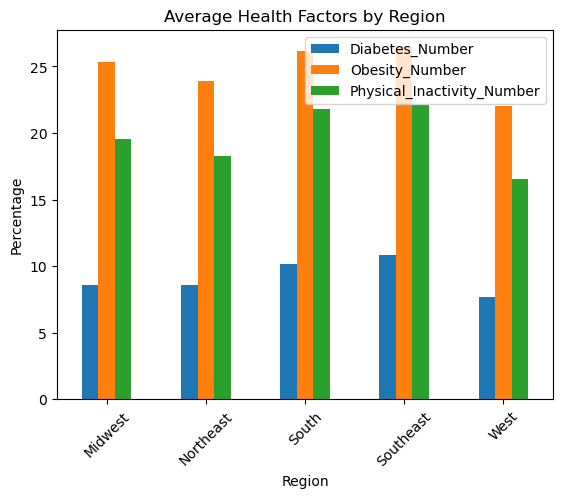

In [19]:
health_factors = diabetes.groupby('Region').mean()[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']]
(health_factors * 100).plot(kind='bar')
plt.title('Average Health Factors by Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

Regions can encapsulate differences in climate, culture, infrastructure, and even policies—all of which can influence health outcomes. By mapping out the prevalence of health factors like diabetes, obesity, and physical inactivity across different regions, we can discern patterns or trends that might be region-specific.From this graph we can highlight the following key findings:
* The Southeast region records the highest percentages across all three health factors. 
* The South has the highest percentage of the population that is physically inactive.
* The West has the lowest rates in all three categories.

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [20]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = True) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10)

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [21]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(labels = ['Diabetes_Number', 'race alone or in combination with one or more other races_total population'],
                           axis = 1)

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

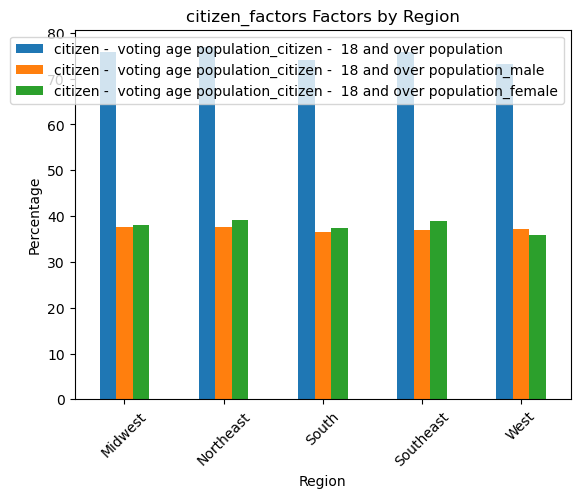

In [22]:
citizen_factors = diabetes.groupby('Region').mean()[['citizen -  voting age population_citizen -  18 and over population',
                                                    'citizen -  voting age population_citizen -  18 and over population_male',
                                                    'citizen -  voting age population_citizen -  18 and over population_female' ]]
(citizen_factors * 100).plot(kind='bar')
plt.title('citizen_factors Factors by Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

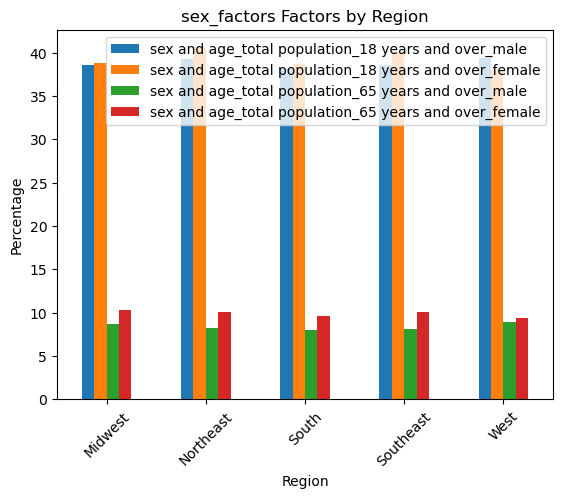

In [23]:
sex_factors = diabetes.groupby('Region').mean()[['sex and age_total population_18 years and over_male',
            'sex and age_total population_18 years and over_female',
            'sex and age_total population_65 years and over_male',
            'sex and age_total population_65 years and over_female']]
(sex_factors * 100).plot(kind='bar')
plt.title('sex_factors Factors by Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


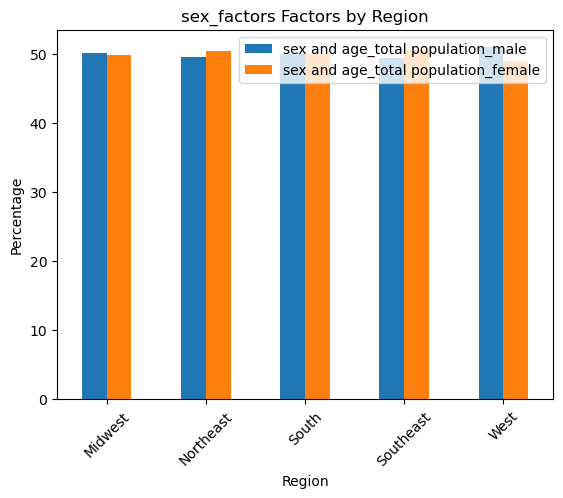

In [24]:
sex_i_factors = diabetes.groupby('Region').mean()[['sex and age_total population_male','sex and age_total population_female']]
(sex_i_factors * 100).plot(kind='bar')
plt.title('sex_factors Factors by Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [25]:
#
# Feature selection
#-----------

X = X.drop(['sex and age_total population_male', 'sex and age_total population_female', 
            'sex and age_total population_18 years and over_male',
            'sex and age_total population_18 years and over_female',
            'sex and age_total population_65 years and over_male',
            'sex and age_total population_65 years and over_female',
           'citizen -  voting age population_citizen -  18 and over population_male',
           'citizen -  voting age population_citizen -  18 and over population_female'], axis = 1)



I eliminated the variables 'sex and age_total population_male' and 'sex and age_total population_female' since the information is already encompassed by the 'sex and age_total population_sex ratio (males per 100 females)' variable. I chose to retain only the 'citizen - voting age population_citizen - 18 and over population' variable, as the data showed no notable variations when segmented by gender.

In [26]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.8,      # specify proportional split for training
                                                    test_size=0.2)       # specify proportional split for test

In [27]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate =  train_test_split(X_train,        
                                                    y_train,                 
                                                    train_size=0.75,         
                                                    test_size=0.25)

In [28]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

As highlighted in our computational social science discussions, when preprocessing data, it's essential to standardize (or normalize) after splitting into training and test sets. This step is vital to ensure that the training process remains uninfluenced by any information from the test data. The act of standardizing involves using the data's mean and standard deviation (SD). If this is done before splitting, it would incorporate insights from both the training and test sets.

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

* **Ordinary Least Squares (OLS):** The Ordinary Least Squares (OLS) method, often used in the LinearRegression model, tries to find the best linear relationship between input data and outputs. It adjusts certain values, called coefficients, to get the closest predictions to actual outcomes. One main assumption of OLS is that the input data points shouldn't be too closely related, or it can make the model's predictions less reliable. This issue is called multicollinearity. Even with this challenge, OLS is popular because it's straightforward and easy to understand, especially when the data is well-prepared and independent.



* **Ridge regression and classification:** Ridge regression is a type of linear regression that adds a penalty to prevent the model from fitting the training data too closely. This helps when data variables are closely related to each other. The strength of the penalty is controlled by a value called "lambda" or "alpha." Ridge also has a classification version, RidgeClassifier. It treats classifying data as a regression problem. This can be efficient, especially with many classes. In short, Ridge is good for data with closely related variables and can help prevent overfitting.


* **Lasso:** The Lasso model, short for "Least Absolute Shrinkage and Selection Operator," is a form of linear regression that incorporates a penalty on the absolute values of its coefficients. What makes Lasso special is its ability to reduce some feature coefficients to exactly zero. This acts as an automatic feature selection, making the model simpler and interpretable. It's good for models with many features because it prevents overfitting and makes the model simpler. The main challenge with Lasso is picking the right "strength" for the feature selection, which is controlled by a parameter called "lambda" or "alpha."

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  (Ordinary Least Squares (OLS)) 

In [29]:
#
# Model 1 training
#-----------
# create a model
lin_reg = LinearRegression()


# specify the hyperparameters
param_grid = {'fit_intercept': [True, False]}          # use dictionary for tuning

# execute the grid search
lin_grid_reg = GridSearchCV(estimator  = lin_reg,      # model to be tuned
                            param_grid = param_grid,   # parameters to be searched as specified above
                            cv=5)                      # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the training data
lin_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on validation dataset
best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_train)     # find best estimator and predict on validate



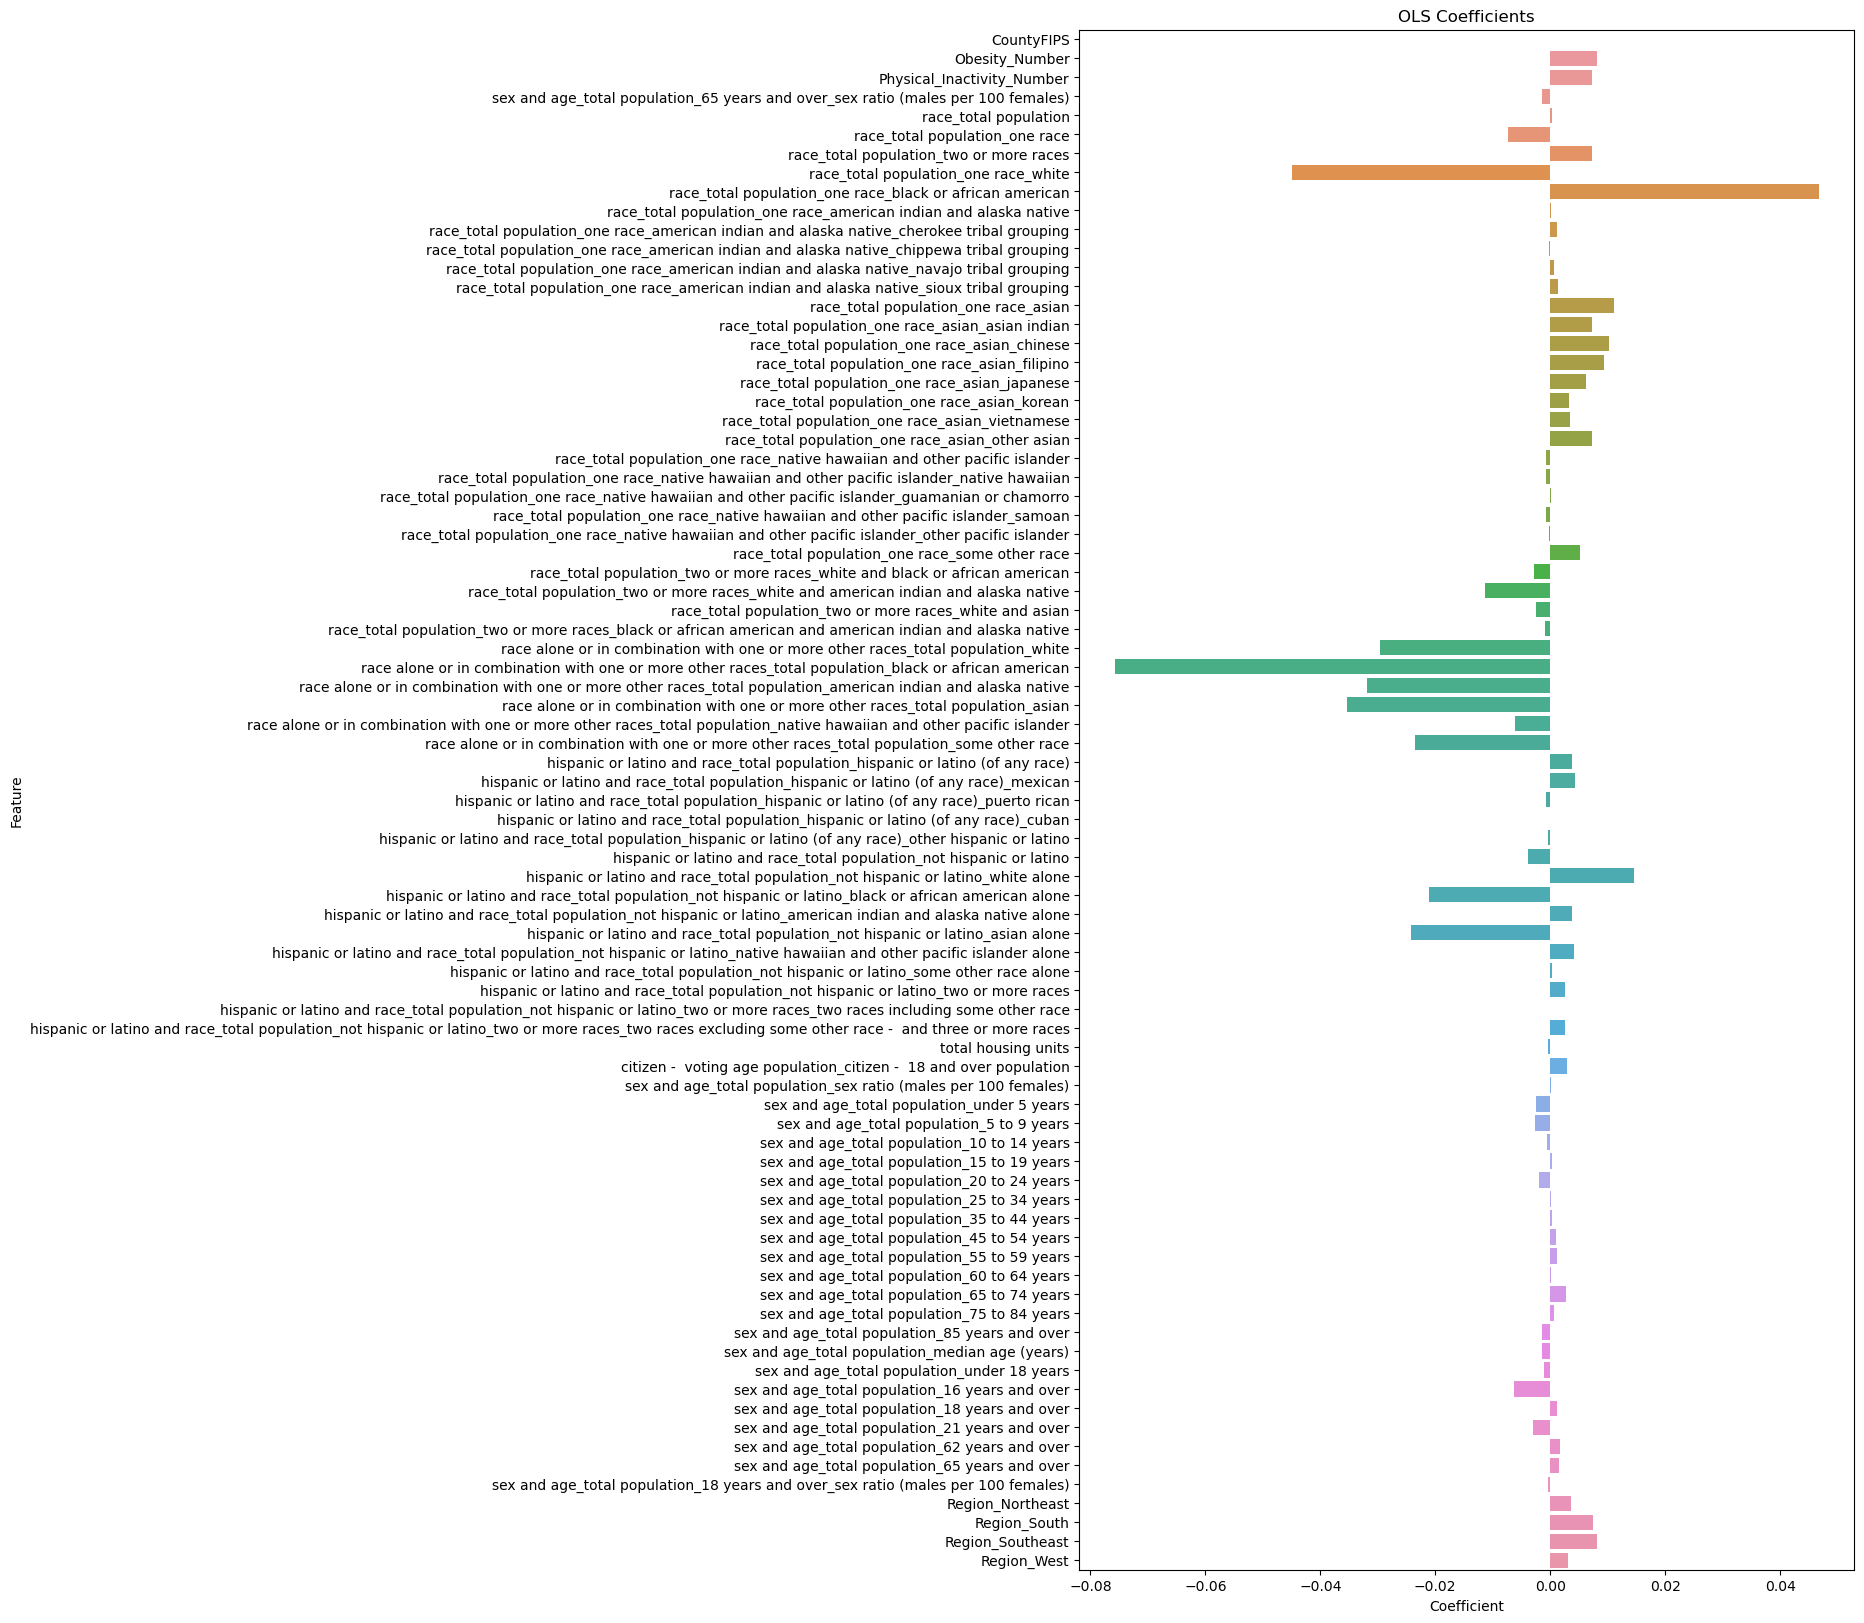

In [30]:
# create a dataframe with the coefficient and feature names for plotting
lin_reg_data = pd.DataFrame([lin_grid_reg.best_estimator_.coef_, X.columns]).T # make a dataframe from the arrays
lin_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity

# plot
plt.figure(figsize=(10, 20))
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=lin_reg_data)                         # specify data

ax.set_title("OLS Coefficients")                            # set title
plt.show()  

In [31]:
# print the results  
print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Training R^2:', lin_grid_reg.score(X_train, y_train))
print('Training RMSE', np.sqrt(mean_squared_error(y_train,best_lin_pred)))

{'fit_intercept': True}
Best CV R^2: 0.47307853799604194
Training R^2: 0.5387823688378621
Training RMSE 0.019622359119284703


#### Model 2:  (Ridge regression) 

In [32]:
#
# Model 2 training
#-----------
# create a lasso model
ridge_reg = Ridge()

# hyperparameter tuning
# specify the hyperparameters
param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

# execute the grid search
ridge_grid_reg = GridSearchCV(ridge_reg,  # model to be tuned
                              param_grid, # parameters to be searched as specified above
                              cv=5)       # 5-fold cross-validation to be used during hypertuning

# fit the tuning on the training data
ridge_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on validation dataset 
best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_train)  


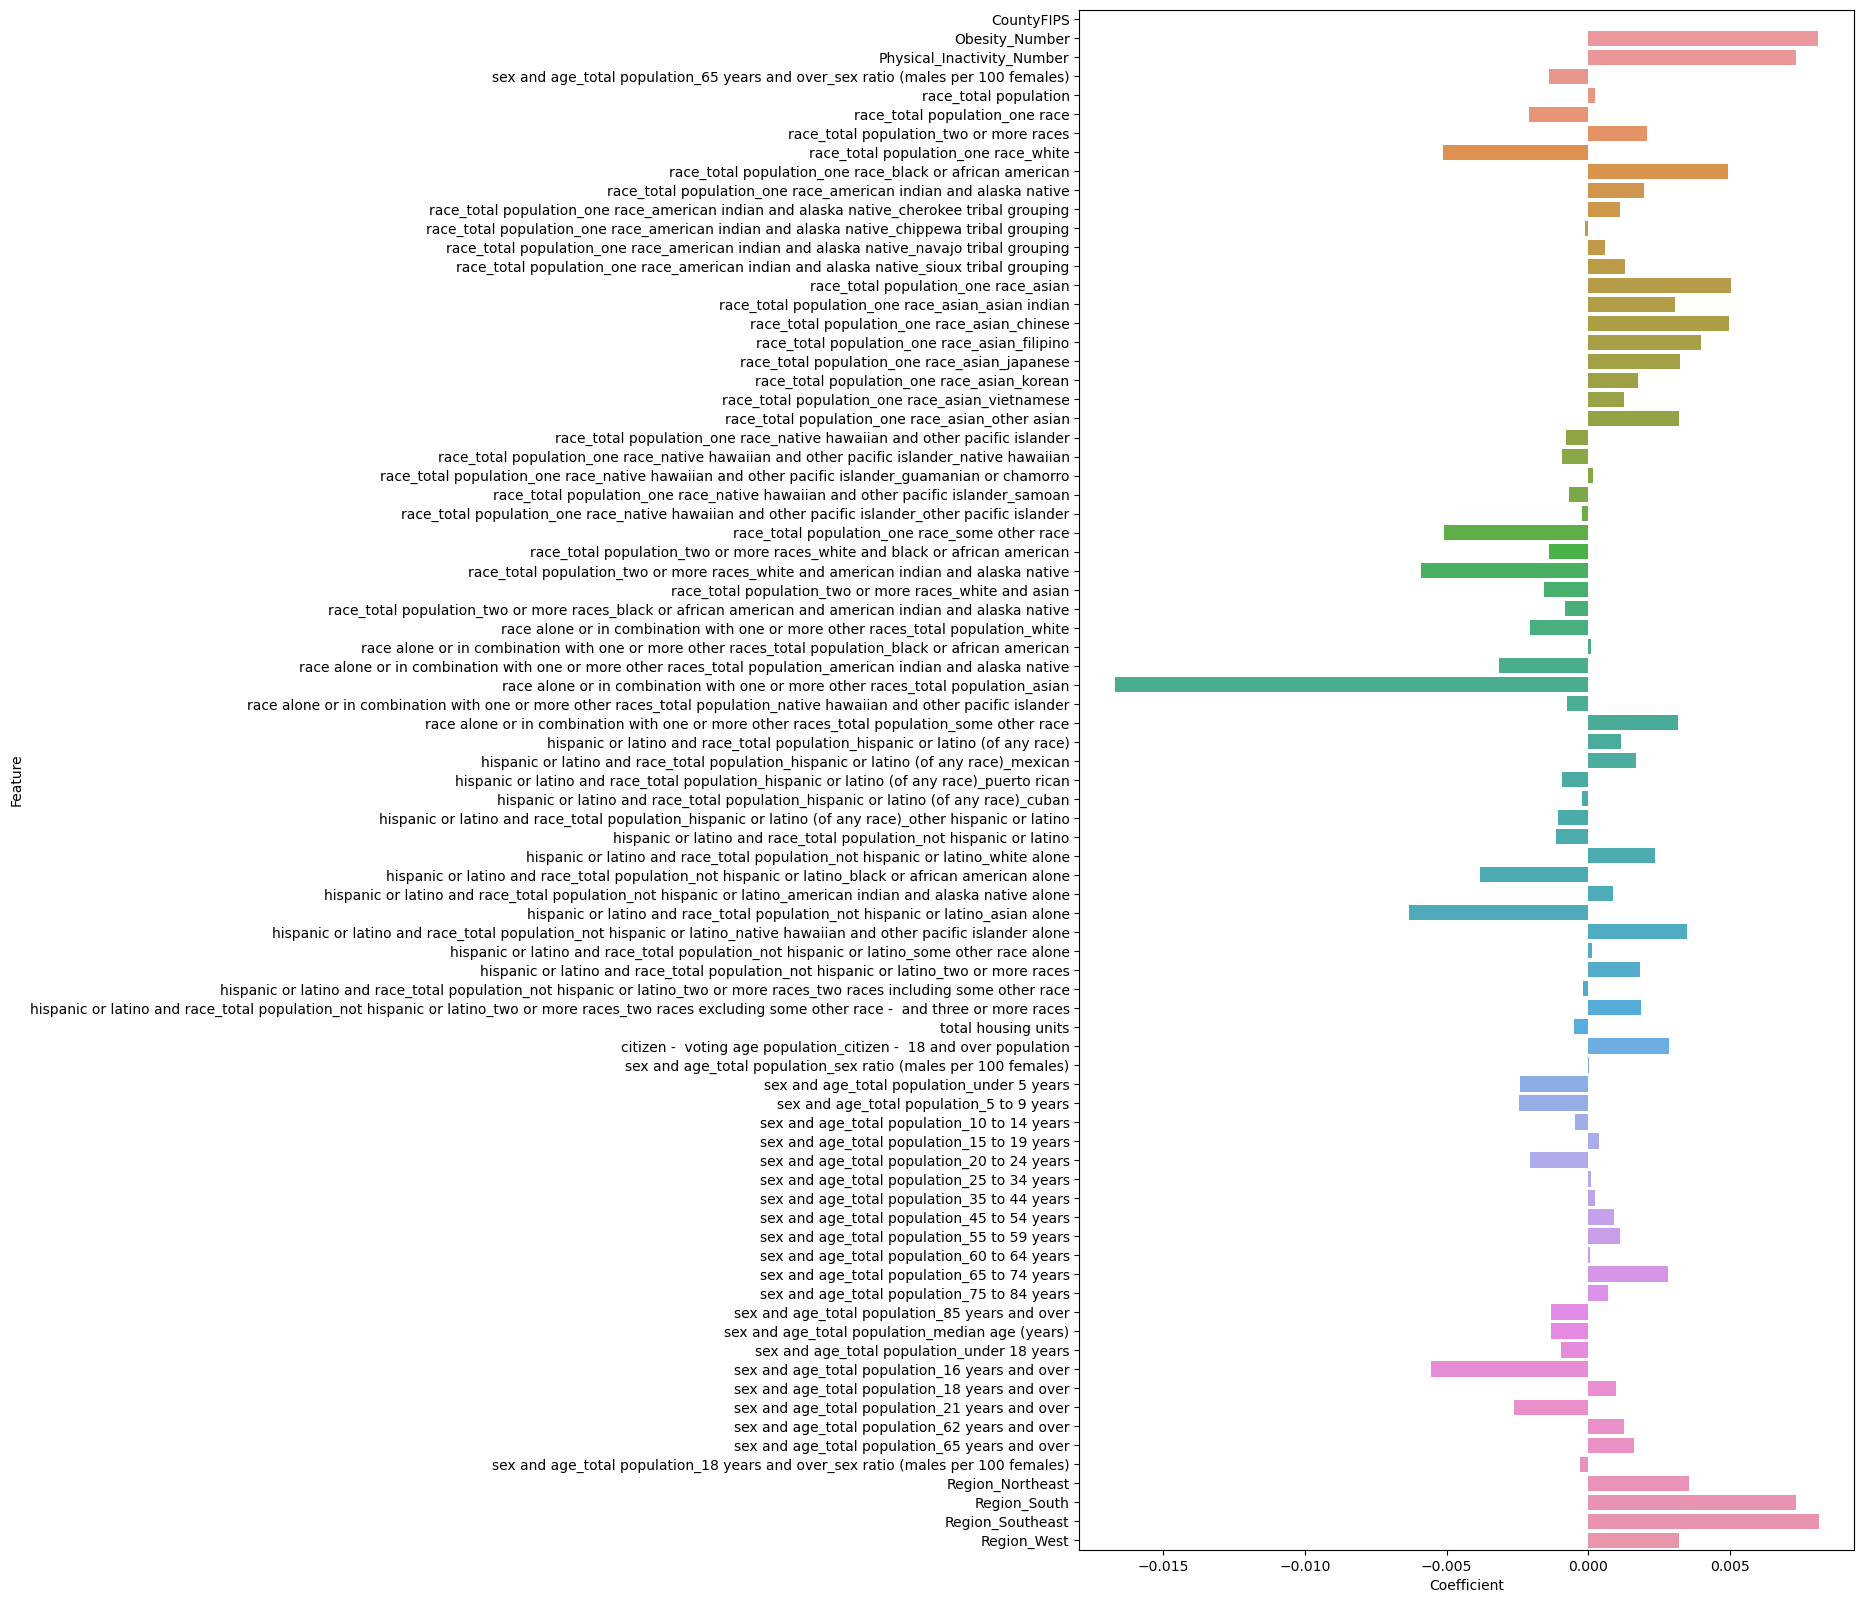

In [33]:
# create dataframe of coefficients of lasso model 
ridge_grid_reg_data = pd.DataFrame([ridge_grid_reg.best_estimator_.coef_, X.columns]).T
ridge_grid_reg_data.columns = ['Coefficient', 'Feature'] 

# set up the figure
plt.figure(figsize=(10, 20))
sns.barplot(x="Coefficient",
           y="Feature",
           data=ridge_grid_reg_data)
ax.set_title("Ridge Coefficients")  
# show plot
plt.show()

In [34]:
# print the results  
print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Training R^2:', ridge_grid_reg.score(X_train, y_train))
print('Training RMSE', np.sqrt(mean_squared_error(y_train, best_ridge_pred)))


{'alpha': 0.9, 'fit_intercept': True, 'solver': 'auto'}
Best CV R^2: 0.48065084727911084
Training R^2: 0.5381249865156519
Training RMSE 0.01963633820200944


#### Model 3:  (Lasso) 

In [35]:
#
# Model 3 training
#-----------
# create a lasso model
lasso_reg = Lasso(max_iter=15000)


# hyperparameter tuning
# specify hyperparameters 
param_grid = {'alpha': np.arange(.0001, .01, .01),
             'fit_intercept': [True, False],
             'selection': ['cyclic', 'random']}

# execute grid search 
lasso_grid_reg = GridSearchCV(lasso_reg,
                             param_grid,
                             cv=5)

# fit to training data
lasso_grid_reg.fit(X_train, y_train)

# select best performing model 
best_index = np.argmax(lasso_grid_reg.cv_results_['mean_test_score'])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_train)


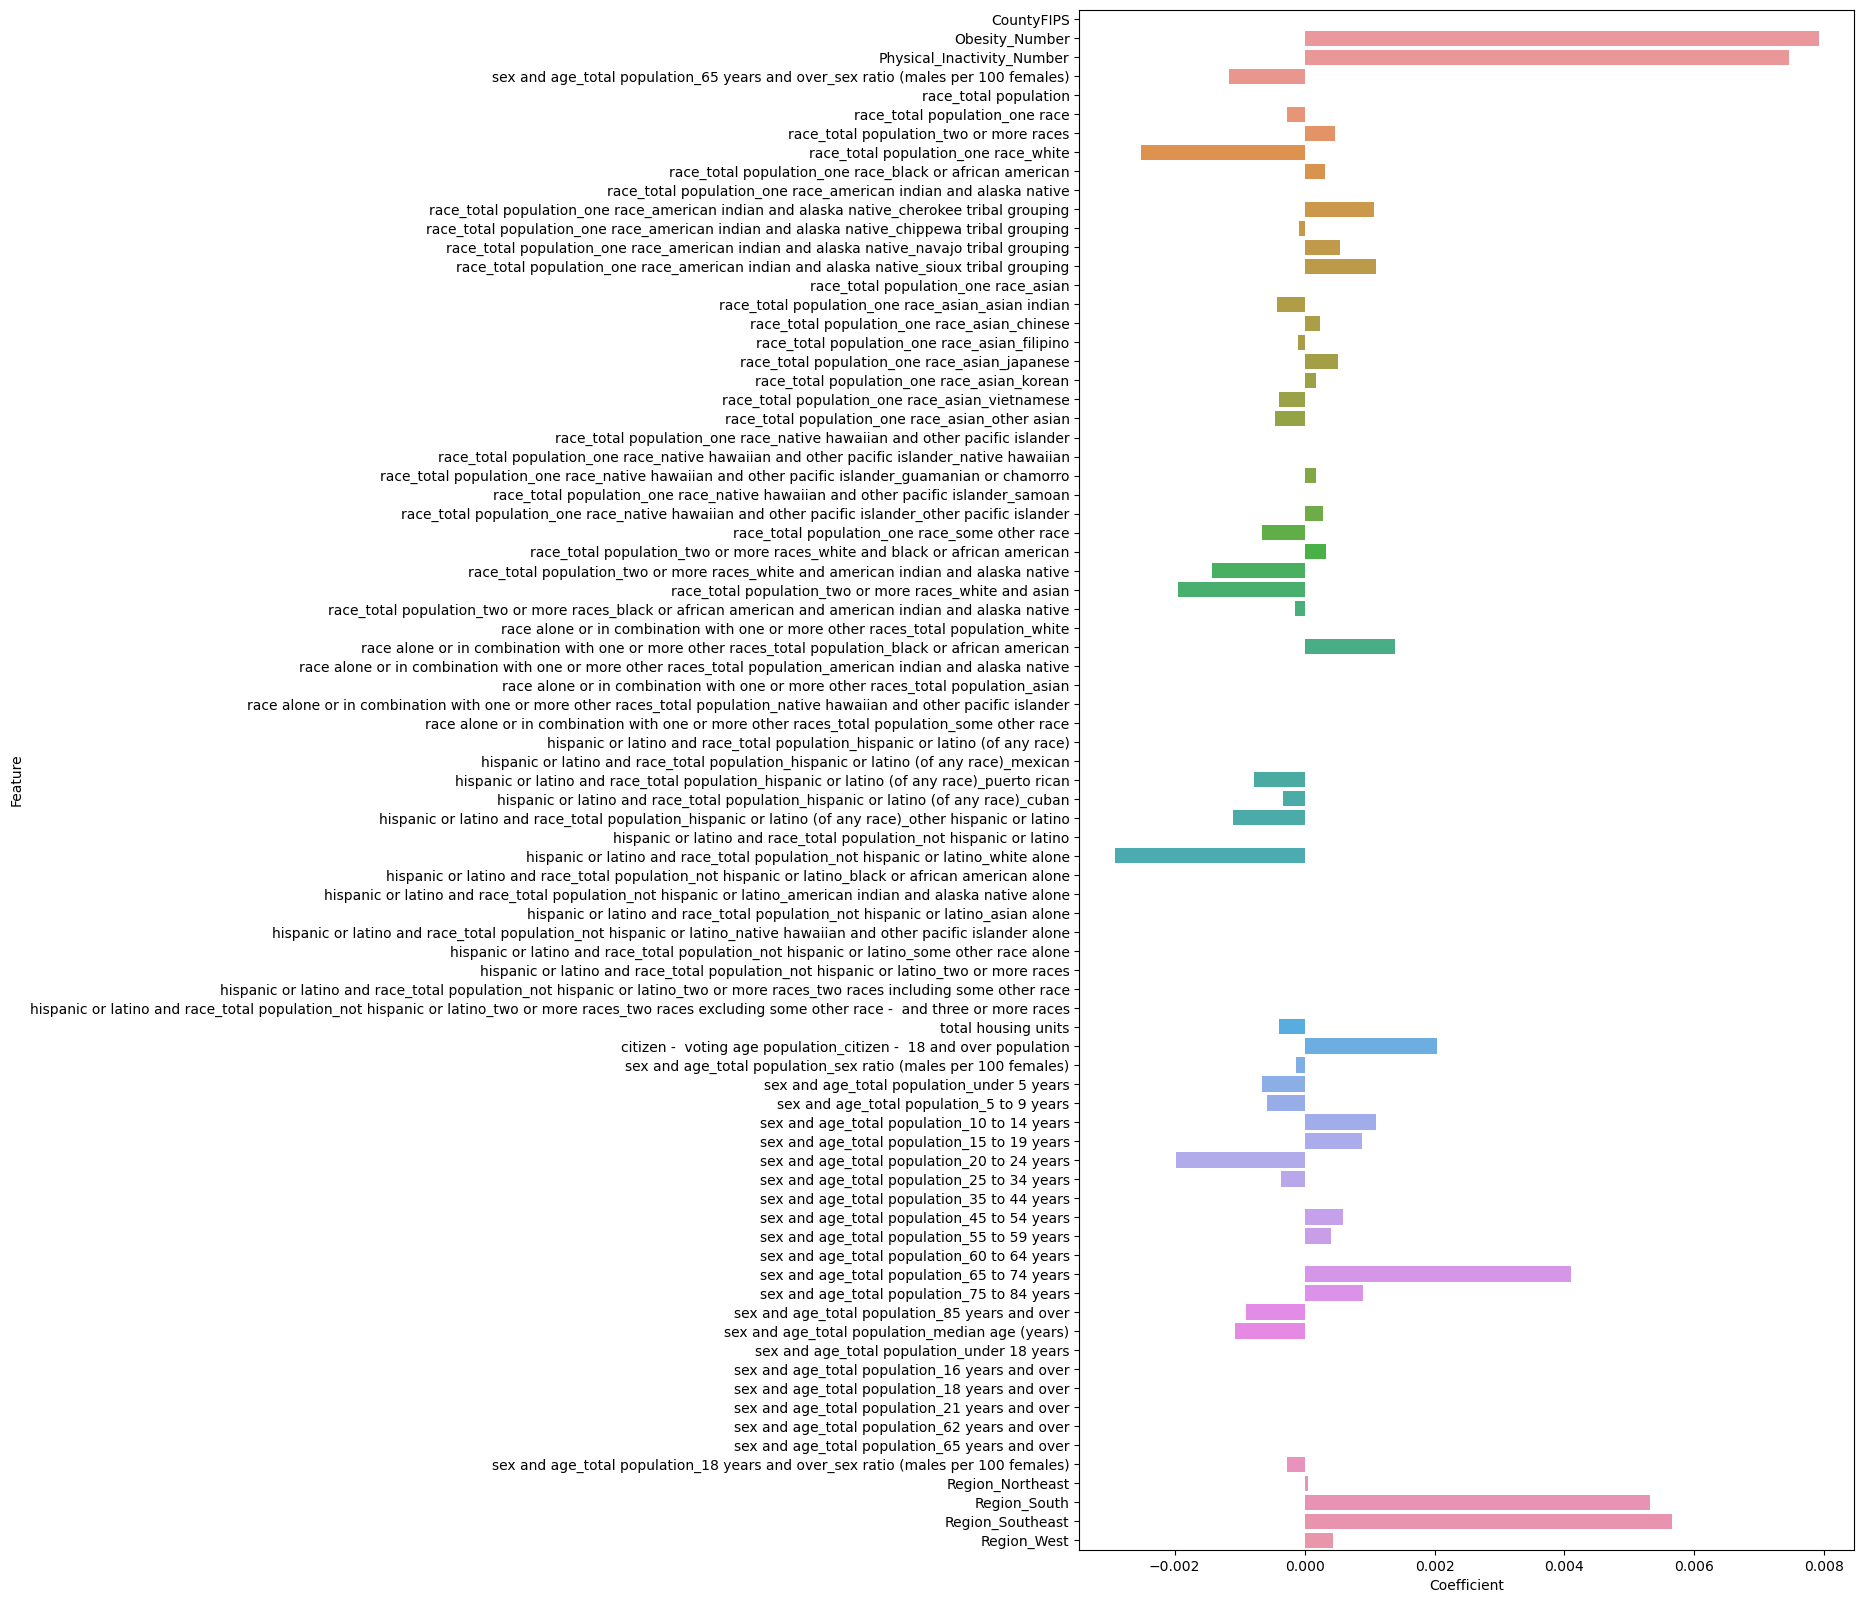

In [36]:
# create dataframe of coefficients of lasso model 
lasso_grid_reg_data = pd.DataFrame([lasso_grid_reg.best_estimator_.coef_, X.columns]).T
lasso_grid_reg_data.columns = ['Coefficient', 'Feature'] 

# set up the figure
plt.figure(figsize=(10, 20))
sns.barplot(x="Coefficient",
           y="Feature",
           data=lasso_grid_reg_data)

ax.set_title("Lasso Coefficients")  
# show plot
plt.show()

In [37]:
# print results
print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Training R^2:', lasso_grid_reg.score(X_train, y_train))
print('Training RMSE', np.sqrt(mean_squared_error(y_train, best_lasso_pred)))

{'alpha': 0.0001, 'fit_intercept': True, 'selection': 'random'}
Best CV R^2: 0.49216304815672773
Training R^2: 0.5332263475007473
Training RMSE 0.019740194897354586


All models are similar when we talk about the training RMSE and R^2. But it looks that the OLS model seem to have the lower RMSE and high R^2.

## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [38]:
#
# Predict on validation data
#-----------

#----------- OLS

best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)     # find best estimator and predict on validate


# print out root mean squared error result
print('OLS')
print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Test RMSE', np.sqrt(mean_squared_error(y_validate, best_lin_pred)))

#----------- RIDGE
best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)   # find best estimator and predict on validate

# print the results
print("Ridge")
print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', np.sqrt(mean_squared_error(y_validate, best_ridge_pred)))




#---------- Lasso
best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)   # find best estimator and predict on validate

# print the results  
print('Lasso')
print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', np.sqrt(mean_squared_error(y_validate, best_lasso_pred)))



OLS
{'fit_intercept': True}
Best CV R^2: 0.47307853799604194
Test R^2: 0.30623535120881684
Test RMSE 0.0216775097304658
Ridge
{'alpha': 0.9, 'fit_intercept': True, 'solver': 'auto'}
Best CV R^2: 0.48065084727911084
Validation R^2: 0.4383610329813876
Validation RMSE 0.019504369805365934
Lasso
{'alpha': 0.0001, 'fit_intercept': True, 'selection': 'random'}
Best CV R^2: 0.49216304815672773
Validation R^2: 0.4611112010589622
Validation RMSE 0.019105257039995594


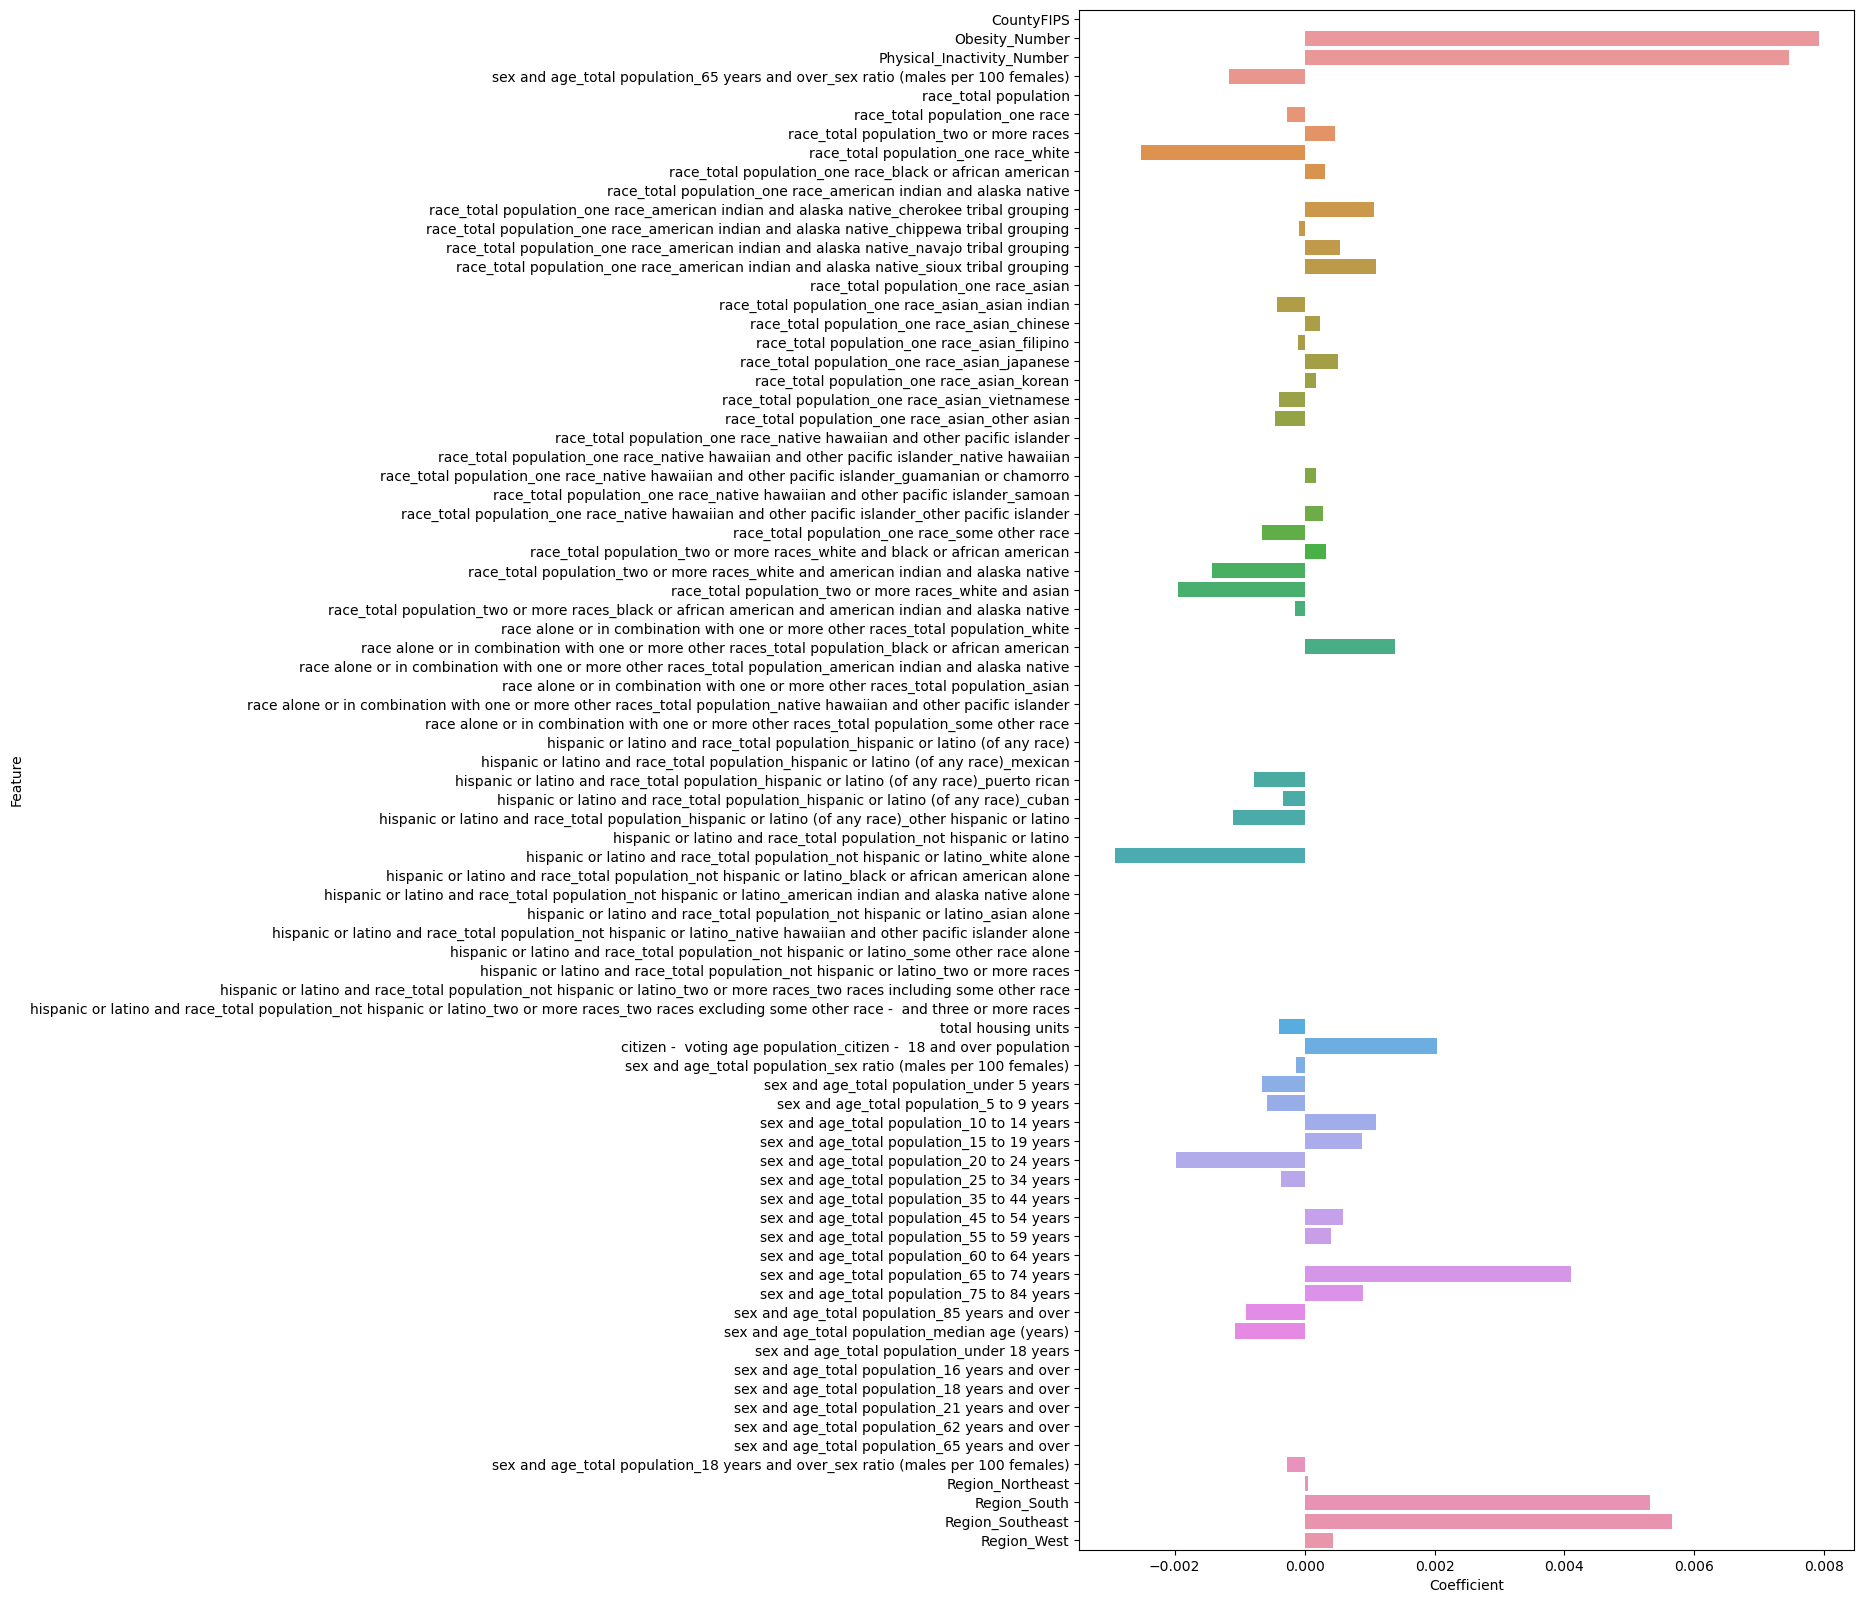

In [39]:
# create dataframe of coefficients of lasso model 
lasso_grid_reg_data = pd.DataFrame([lasso_grid_reg.best_estimator_.coef_, X.columns]).T
lasso_grid_reg_data.columns = ['Coefficient', 'Feature'] 

# set up the figure
plt.figure(figsize=(10, 20))
sns.barplot(x="Coefficient",
           y="Feature",
           data=lasso_grid_reg_data)

ax.set_title("Lasso Coefficients")  
# show plot
plt.show()

The predictions from the validation data show comparable values for both RMSE and R^2. However, the Lasso model appears to outperform the others with superior R^2 and RMSE metrics, also looking at the graph Lazzo forze some of the coefficient estimates to be exaxtly zero and it makes easy to select the important features.

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [40]:
threshold = 0.001
important_features = lasso_grid_reg_data[lasso_grid_reg_data['Coefficient'].abs() > threshold]['Feature']

# filter the training and validation sets to keep only the important features
X_train_filtered = X_train[important_features]
X_validate_filtered = X_validate[important_features]
X_test_filtered = X_test[important_features]


In [41]:
# create a lasso model
lasso_reg = Lasso(max_iter=15000)

# hyperparameter tuning

# specify hyperparameters 
param_grid = {'alpha': np.arange(.0001, .01, .01),
             'fit_intercept': [True, False],
             'selection': ['cyclic', 'random']}

# execute grid search 
lasso_grid_reg = GridSearchCV(lasso_reg,
                             param_grid,
                             cv=5)

# fit to training data
lasso_grid_reg.fit(X_train_filtered, y_train)

# select best performing model on validation data
best_index = np.argmax(lasso_grid_reg.cv_results_['mean_test_score'])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate_filtered)

# print results
print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate_filtered, y_validate))
print('Validation RMSE', np.sqrt(mean_squared_error(y_validate, best_lasso_pred)))

{'alpha': 0.0001, 'fit_intercept': True, 'selection': 'random'}
Best CV R^2: 0.5069954939680439
Validation R^2: 0.4585253243062344
Validation RMSE 0.019151040804094157


In [42]:
# PREDICTING ON TEST DATA
# pick best estimator and predict on test
best_pred = lasso_grid_reg.best_estimator_.predict(X_test_filtered)

# print results
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', lasso_grid_reg.score(X_test_filtered, y_test))
print('Test RMSE', np.sqrt(mean_squared_error(best_pred, y_test)))

Best CV R^2: 0.5069954939680439
Test R^2: 0.4530363903933301
Test RMSE 0.02038331509248625


### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [43]:
#
# Run cross-validation
#-----------
# using best estimator from grid search, compute CV scores
best_estimator = lasso_grid_reg.best_estimator_
cv_scores = cross_val_score(best_estimator, X_train_filtered, y_train, cv=5)

# average CV score
cv_mean = np.mean(cv_scores)
print('Cross-validation R^2', cv_mean)


Cross-validation R^2 0.5070000160055589


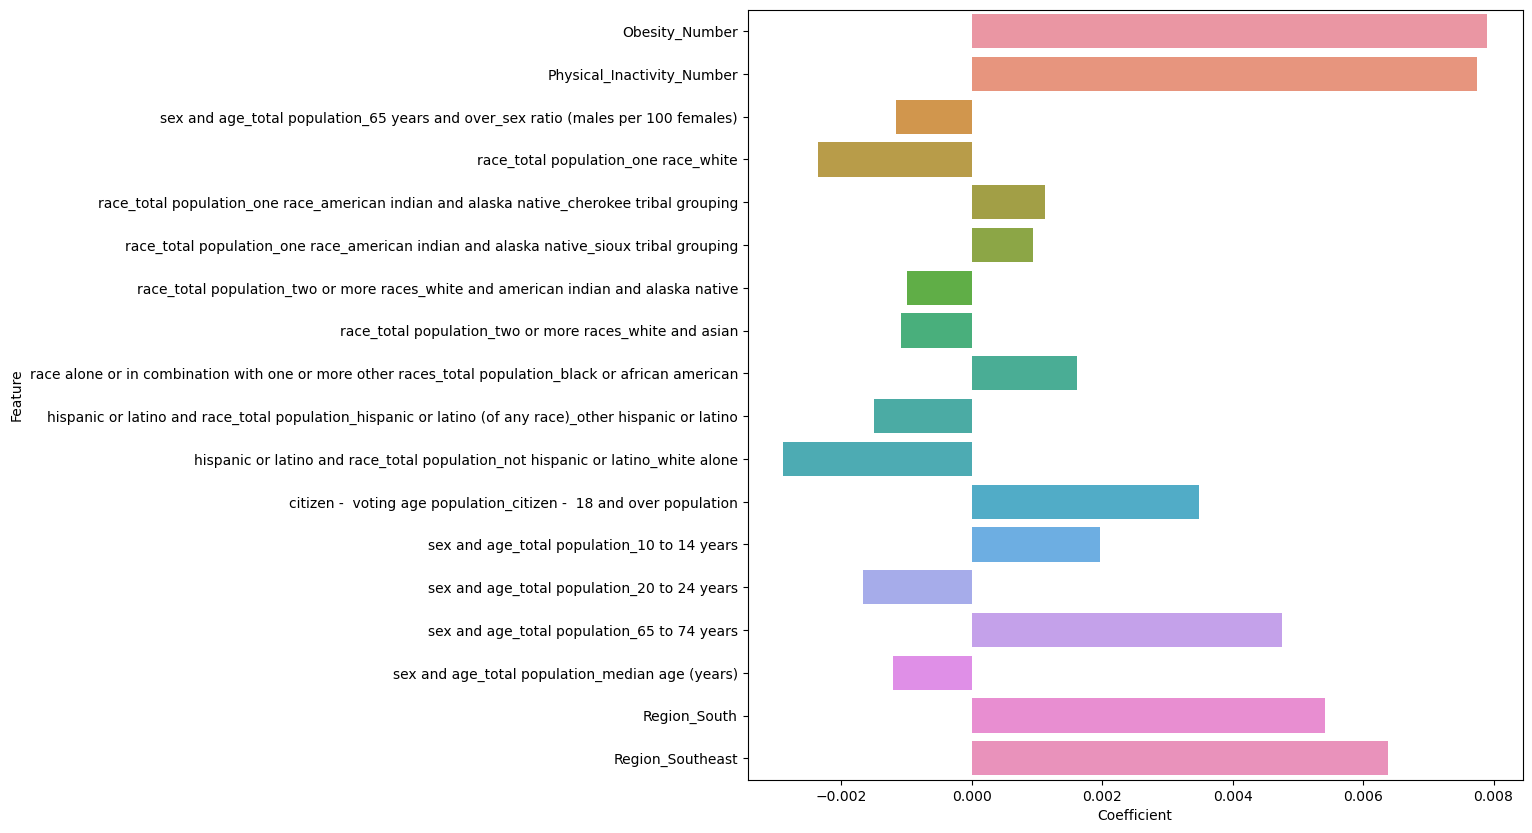

In [44]:
#
# Create figure with coefficients of new model
#-----------

# Create DataFrame of coefficients for the retrained model
new_lasso_coef_data = pd.DataFrame([best_estimator.coef_, important_features]).T
new_lasso_coef_data.columns = ['Coefficient', 'Feature']

# Set up the figure
figure = plt.figure(figsize=(10, 10))

# Create the barplot
sns.barplot(x="Coefficient", y="Feature", data=new_lasso_coef_data)

# Show the plot
plt.show()

## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

**ANSWER:** The bias-variance tradeoff is a fundamental concept in machine learning, balancing the model's accuracy with its sensitivity to data variations. High bias can cause a model to miss key data patterns (underfitting), while high variance can make it overly tailored to the training data (overfitting). Techniques like Ridge Regression and Lasso, as discussed by Witten, Tibshirani, and Taylor (2023), and Molina and Garip (2019), help navigate this tradeoff by adjusting model complexity, ensuring it captures data patterns without being overly specific.

2. Define overfitting, and why it matters for machine learning. How can we address it?

**ANSWER** Overfitting happens when a machine learning model learns too much from training data, including its noise and outliers, causing it to perform poorly on new data. It's like memorizing answers for a test instead of understanding the concepts. To prevent this, we can split our data to train and test the model, use techniques like regularization to penalize complexity, and avoid making the model too detailed or relying too heavily on certain features. Monitoring for overfitting helps keep our models effective and reliable. To address overfitting we can apply: 
* Split the data into training and validation/test sets to evaluate the model's performance on unseen data.
* Regularization: Techniques like Lasso and Ridge regression add penalties to the model's complexity, discouraging overly complex models.

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

**ANSWER:** The data from the Lasso regression model reveals "Obesity_Number" and "Physical_Inactivity_Number" as pivotal health indicators in counties. Areas with high rates in these metrics are prime candidates for interventions. While these stand out as dominant indicators, we must also factor in race, gender, and age composition to ensure equitable resource distribution. Notably, regions with high black populations and those associated with Cherokee and Sioux tribal communities warrant attention. The South and Southeast US regions, known for their heightened diabetes rates, should be prioritized in our intervention efforts.

Equally crucial is the age demographic, with counties housing a majority of their population between 65 to 74 years presenting increased susceptibility. Our model's credibility is reinforced by its alignment with existing health research: regions with predominant US-born residents, and those with higher percentages of black, elderly, inactive, or obese populations, are prone to elevated diabetes rates.